# Notebook for Part 2 - Decision Trees

In [17]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

Loading the train and test data sets

In [18]:
df_train = pd.read_csv("../heart_disease_data/train_dataset.csv")
df_test = pd.read_csv("../heart_disease_data/test-dataset-oh.csv")

columns = df_train.columns
df_train_feature = df_train[columns[:-1]]
df_train_target = df_train["num"]
df_test_feature = df_test[columns[:-1]]
df_test_target = df_test["num"]

## 2.a) Question: Base line approach of allways predicting the mode.

In [19]:
'''create a baseline classifier that will always guess the most probable target'''

d_classifier = DummyClassifier()

d_fit = d_classifier.fit(df_train_feature,df_train_target)
score = d_classifier.score(df_test_feature,df_test_target)
print(score)


0.34782608695652173


## 2.b) Creating a decision tree

0.5652173913043478 0.5478260869565217
0.6739130434782609 0.6072463768115942
0.6521739130434783 0.6217391304347826
0.6956521739130435 0.6391304347826087
0.6956521739130435 0.6565217391304348
0.6086956521739131 0.6826086956521739
0.6304347826086957 0.7101449275362319
0.5652173913043478 0.7217391304347827
0.5869565217391305 0.7304347826086957
0.5869565217391305 0.7318840579710145
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


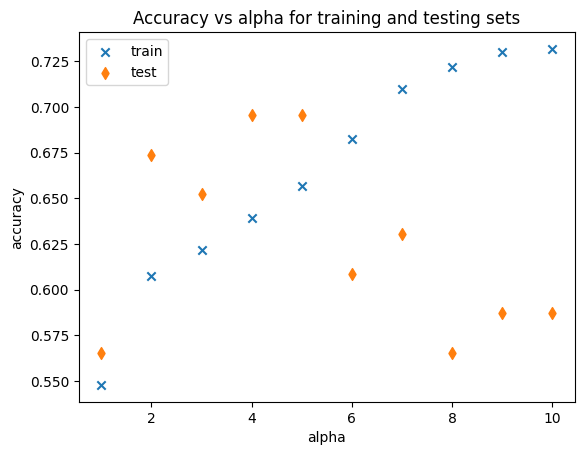

In [ ]:

accuracy_test = []
accuracy_train = []
for i in range(1,11):
    t = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6, random_state=42, max_depth=i)

    t_fit = t.fit(df_train_feature,df_train_target)
    t_score_train = t.score(df_train_feature,df_train_target)
    t_score_test = t.score(df_test_feature,df_test_target)
    print(t_score_test,t_score_train)
    accuracy_test.append(t_score_test)
    accuracy_train.append(t_score_train)
x = np.linspace(1,10,10)
print(x)
fig, ax = plt.subplots()
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs max_depth for training and testing sets")
ax.scatter(x, accuracy_train, marker="x", label="train")
ax.scatter(x, accuracy_test, marker="d", label="test")

ax.legend()
plt.show()


## 2.c) Question: Draw a decision tree